# Lab 4: Time Series Data
![Time Series](https://uploads-ssl.webflow.com/5ec4696a9b6d337d51632638/6033e511c460742564ad33f7_63C156C6-39FD-4AB8-A947-0CA2F2B58180-p-800.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## A short Introduction on Temporal Data in pandas

When reading in temporal data such as date and/or time from strings, ``.csv`` files or other sources, you are going to need some way to store these values in an appropriate data type. In pandas, a single point in time is represented as a ``Timestamp``. Use [``to_datetime()``](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) to convert all kinds of formats to a ``Timestamp``.

In [2]:
pd.to_datetime('2019-12-03 1:35pm')

Timestamp('2019-12-03 13:35:00')

In [3]:
pd.to_datetime('7/8/1952')

Timestamp('1952-07-08 00:00:00')

The date above is interpreted as ``month/day/year``, but you may change the order of day and month by setting the ``dayfirst`` parameter.

In [4]:
pd.to_datetime('7/8/1952', dayfirst=True)

Timestamp('1952-08-07 00:00:00')

If we supply a list or array of strings as input to [``to_datetime()``](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html), a sequence of date/time values in an object of type [``DatetimeIndex``](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html#pandas.DatetimeIndex) is returned. This is the core data structure that powers much of pandas time series functionality.

In [5]:
pd.to_datetime(['2018-01-05', '7/8/1952', 'Oct 10, 1995'])

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

If we pass a number of strings using the same date/time format, we can explicitly specify this format by using the ``format`` parameter.

In [6]:
pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y')

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

In [7]:
pd.to_datetime(['2/25/2010', '8/6/2017', '12/15/2012'], format='%m/%d/%Y')

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

## TASK 1: Data Preparation for Time Series Analysis (15%)

In this lab session, you will work with electricity data from the [Open Power System Data (OPSD)](https://open-power-system-data.org/). The dataset includes details daily totals for the whole of Germany of power consumption and production (solar and wind) in gigawatt hours (GWh) from 2006-2017.

You can find more information about the data set as well as an in-depth tutorial on how to work with the data set in a blog by Jennifer Walker ([Time Series Analysis with Pandas (Tutorial)](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/)). Also have a look at [Working with Time Series in Python (Tutorial)](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html) if you're interested in further reading on the topic.

### 1. Loading and exploring the data set (9%)

Use the cells below to achieve the following:

- To start, read ``opsd_germany_daily.csv`` into `df` and call its ``head()`` method.
- Next, just like you did in the last session, have a look at some basic statistics of each feature by calling the ``describe()`` function.
- Check the datatypes of each column. Having in mind our short introduction, are you able to identify the steps you need to take to make the ``Date`` column usable in time series plots?

In [8]:
# YOUR CODE HERE
df = pd.read_csv("opsd_germany_daily.csv")
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [9]:
# Ignore this cell - it is needed for automated grading.

In [10]:
# YOUR CODE HERE
df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


In [11]:
# YOUR CODE HERE
df.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

As you can see, column ``Date`` is of type _object_. To convert it, apply pandas' [``to_datetime()``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) function to the whole column and confirm the operation by printing the ``df``'s datatypes after conversion.

In [12]:
# YOUR CODE HERE
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [13]:
# Ignore this cell - it is needed for automated grading.

### 2. Set the ``Date`` column as the ``df``'s index (3%)

- Instead of relying on successive numeration as the index, set the index of ``df`` to ``Date`` by calling its [``set_index()``](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html) method.
- Fair warning though: if you want to do this on other data sets, be sure to check if the column you set your index to is unique to avoid problems with duplicate indices.
- Don't forget to call the ``head()`` method to see the impact of your changes.

In [14]:
# YOUR CODE HERE
df.set_index('Date', inplace=True)
df

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [15]:
# Ignore this cell - it is needed for automated grading.

### 3. Add further information to ``df`` (3%)

Add new columns named _Year_, _Month_ (January-December), and _Weekday_ (Monday-Sunday) and fill it with the corresponding values from the temporal information stored in ``df.index``.

Refer to the documentation of [``DatetimeIndex``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) to find the attribute or method you need to access to extract this information from ``df.index``.

Once more, confirm the changes you made by calling ``df.head()``.

In [16]:
# YOUR CODE HERE
date_index = pd.DatetimeIndex(df.index)

df['Year'] = date_index.year
df['Month'] = date_index.month
df['Weekday'] = date_index.day_name()

df.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday


In [17]:
# Ignore this cell - it is needed for automated grading.

### 4. Make use of timebased indexing

Now that you went through all that trouble to set up ``df`` to be indexed by timestamps, run the cells below to get an idea of the convenience of timebased indexing.

You are now able to select specific days, months or years and even custom date ranges by using  ``df.loc[...]`` with strings. Feel free to try to retreive different sets of dates!

In [18]:
df.loc['2014-12-11']

Consumption    1631.714
Wind            487.782
Solar            10.985
Wind+Solar      498.767
Year               2014
Month                12
Weekday        Thursday
Name: 2014-12-11 00:00:00, dtype: object

In [19]:
df.loc['2012-03']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-03-01,1411.553,62.293,40.042,102.335,2012,3,Thursday
2012-03-02,1402.006,39.972,38.665,78.637,2012,3,Friday
2012-03-03,1186.275,107.629,55.380,163.009,2012,3,Saturday
2012-03-04,1072.078,80.685,32.054,112.739,2012,3,Sunday
2012-03-05,1388.816,154.206,32.907,187.113,2012,3,Monday
2012-03-06,1433.166,61.690,83.002,144.692,2012,3,Tuesday
2012-03-07,1455.451,157.059,75.157,232.216,2012,3,Wednesday
2012-03-08,1412.181,150.182,44.725,194.907,2012,3,Thursday
2012-03-09,1399.515,126.102,92.597,218.699,2012,3,Friday


In [20]:
df.loc['2015-06-03':'2015-06-10']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2015-06-03,1412.579,316.339,177.705,494.044,2015,6,Wednesday
2015-06-04,1205.178,56.149,218.299,274.448,2015,6,Thursday
2015-06-05,1320.672,156.822,216.424,373.246,2015,6,Friday
2015-06-06,1174.111,184.088,181.009,365.097,2015,6,Saturday
2015-06-07,1070.875,109.243,186.591,295.834,2015,6,Sunday
2015-06-08,1395.467,160.107,119.035,279.142,2015,6,Monday
2015-06-09,1418.821,106.815,97.876,204.691,2015,6,Tuesday
2015-06-10,1424.700,84.706,143.400,228.106,2015,6,Wednesday


## TASK 2: Plotting Time Series using pandas and matplotlib (40%)

Let's put our ``DataFrame`` to the test and visualize its contents.
    
<font color='red'>**Make sure that your plots contain all necessary information (e.g. title, axis labels, ...). Also increase the figure sizes and/or resolutions to acceptable levels and ensure that all textual information provided is readable.**</font>


### 1. Germany's Energy Consumption over the years (10%)

Use [``df.plot(...)``](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) to plot a time series plot of Germany's daily energy `Consumption` from 2006-2017. 


Since ``df.plot(...)`` is based on ``matplotlib`` you can rely on ``matplotlib.pyplot`` (already imported for you as ``plt``) to make the necessary changes.

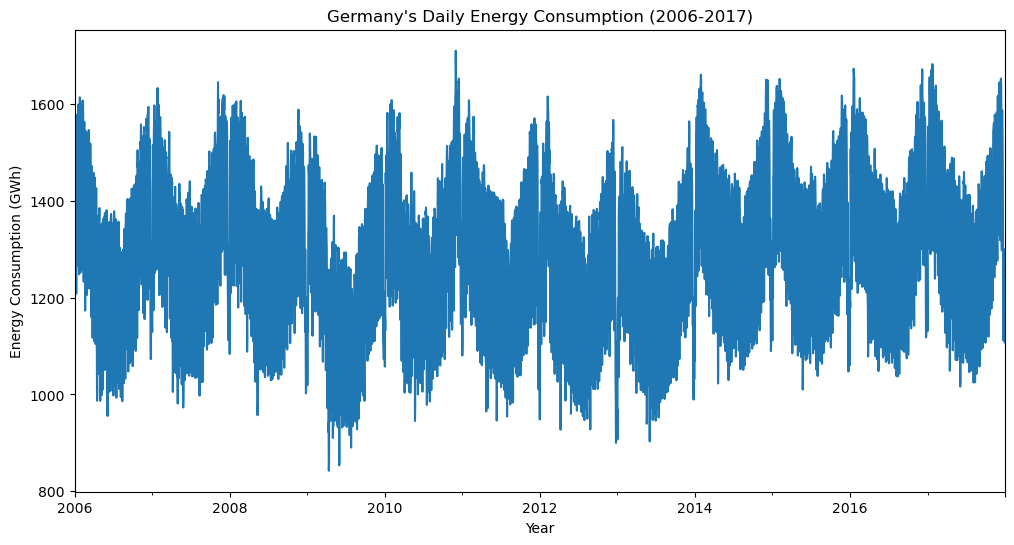

In [21]:
# YOUR CODE HERE
df_2006_to_2017 = df['2006-01-01':'2017-12-31']

# Plot the time series
df_2006_to_2017['Consumption'].plot(figsize=(12, 6))
plt.title("Germany's Daily Energy Consumption (2006-2017)")
plt.xlabel("Year")
plt.ylabel("Energy Consumption (GWh)")
plt.show()

### 2. Improving the first plot (8%)

Replot Germany's Energy Consumption from 2006-2017. Use a different ``marker`` and set `linestyle=None`. You can pass these arguments to pandas ``df.plot(...)`` method, as they are passed on to the underlying matplotlib plotting function. Further information on how to do this can be cound here: [``matplotlib.pyplot.plot(...)``](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

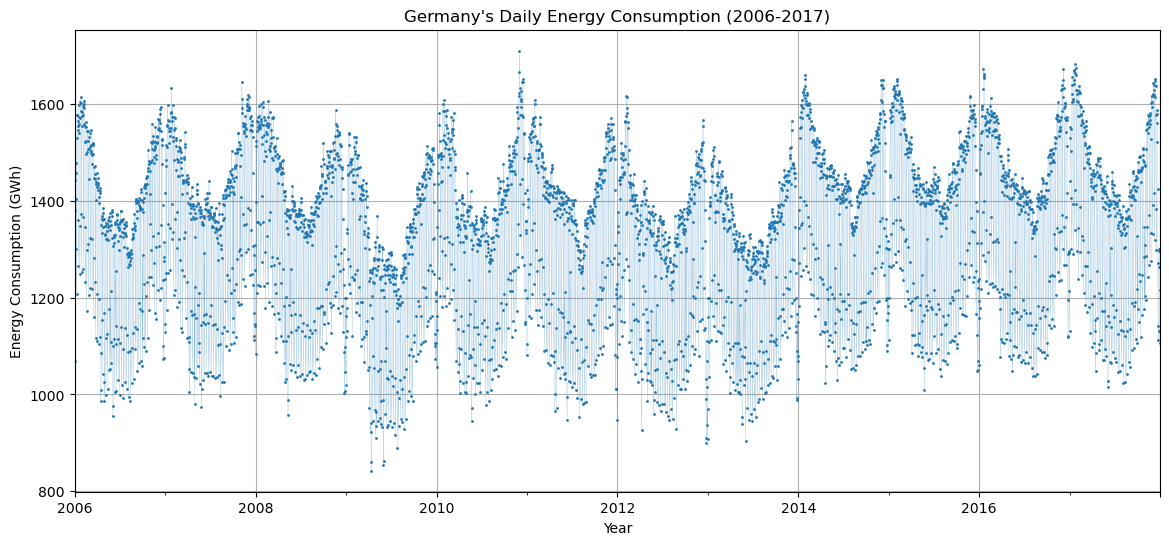

In [22]:
# YOUR CODE HERE
df_2006_to_2017['Consumption'].plot(figsize=(14, 6), marker='o', linestyle=None, linewidth=0.1, markersize=1)
plt.title("Germany's Daily Energy Consumption (2006-2017)")
plt.xlabel("Year")
plt.ylabel("Energy Consumption (GWh)")
plt.grid(True)
plt.show()

### 3. Plot additional information in subplots using pandas (8%)

Now, we want to add two additional subplots containing time series plots for `Solar` and `Wind` to our subplot displaying ``Consumption``.

The easiest way to do this with pandas is to specify which columns remain in the ``DataFrame`` you are calling the ``plot()`` method on.

If you want to print a fancier plot, you may want to try out other methods such as using matplotlib to specify the arrangement of subplots manually and then plotting each column on one of the axes within the subplots.

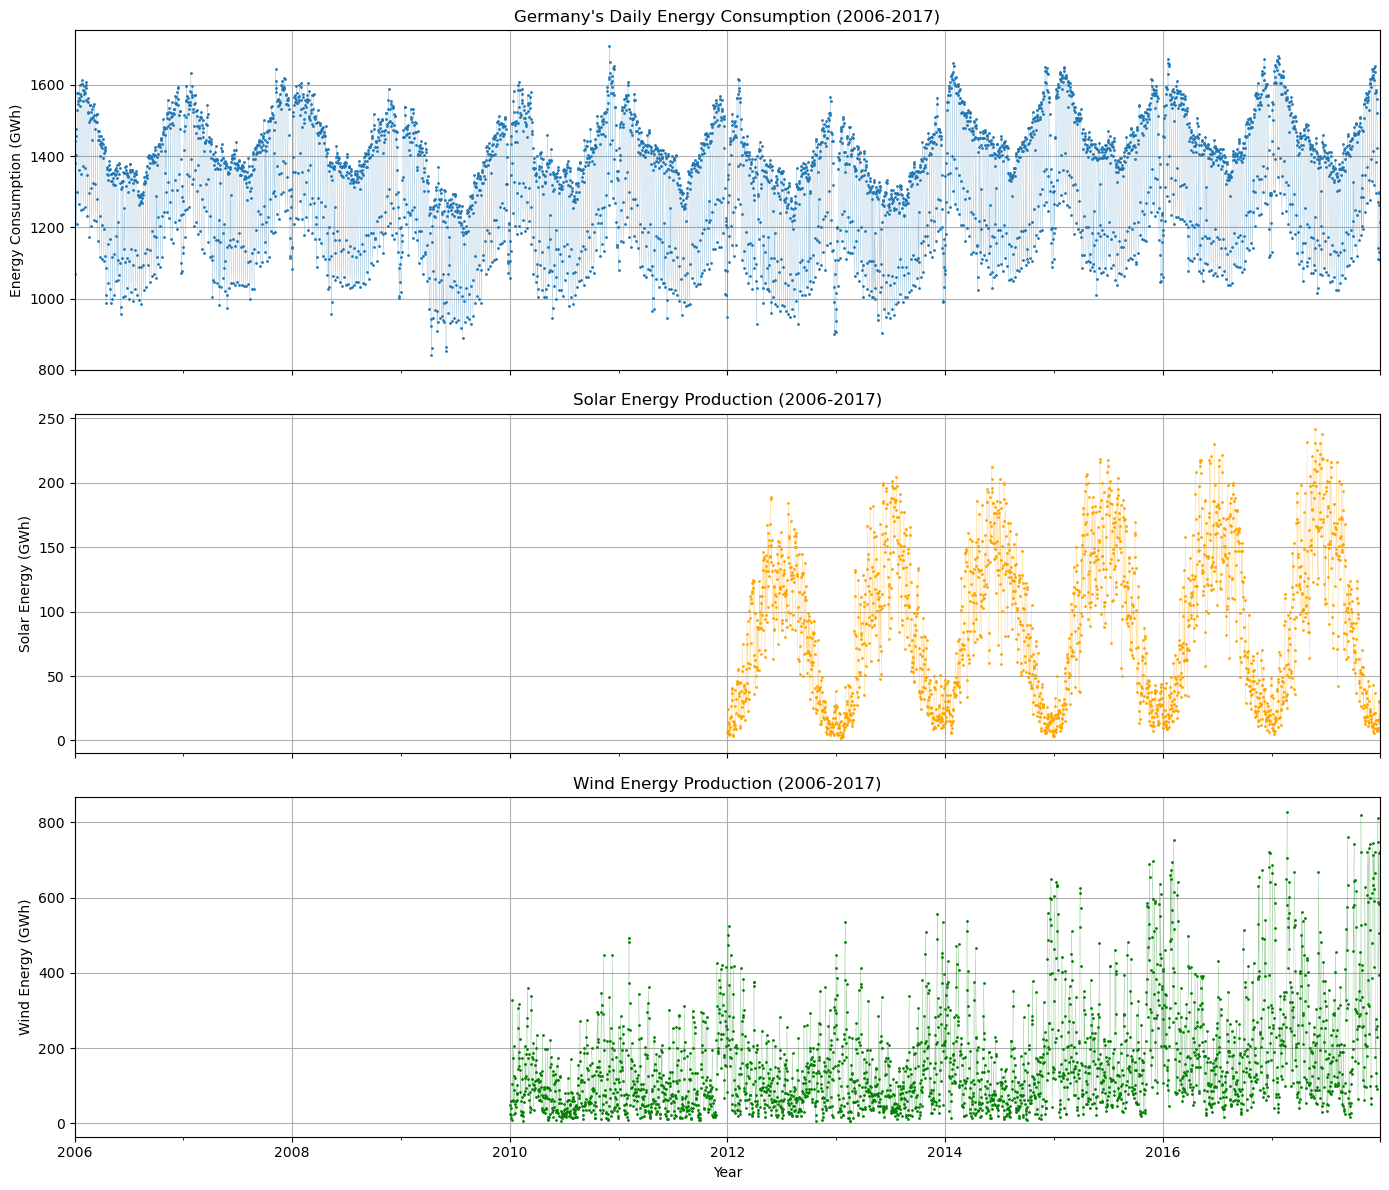

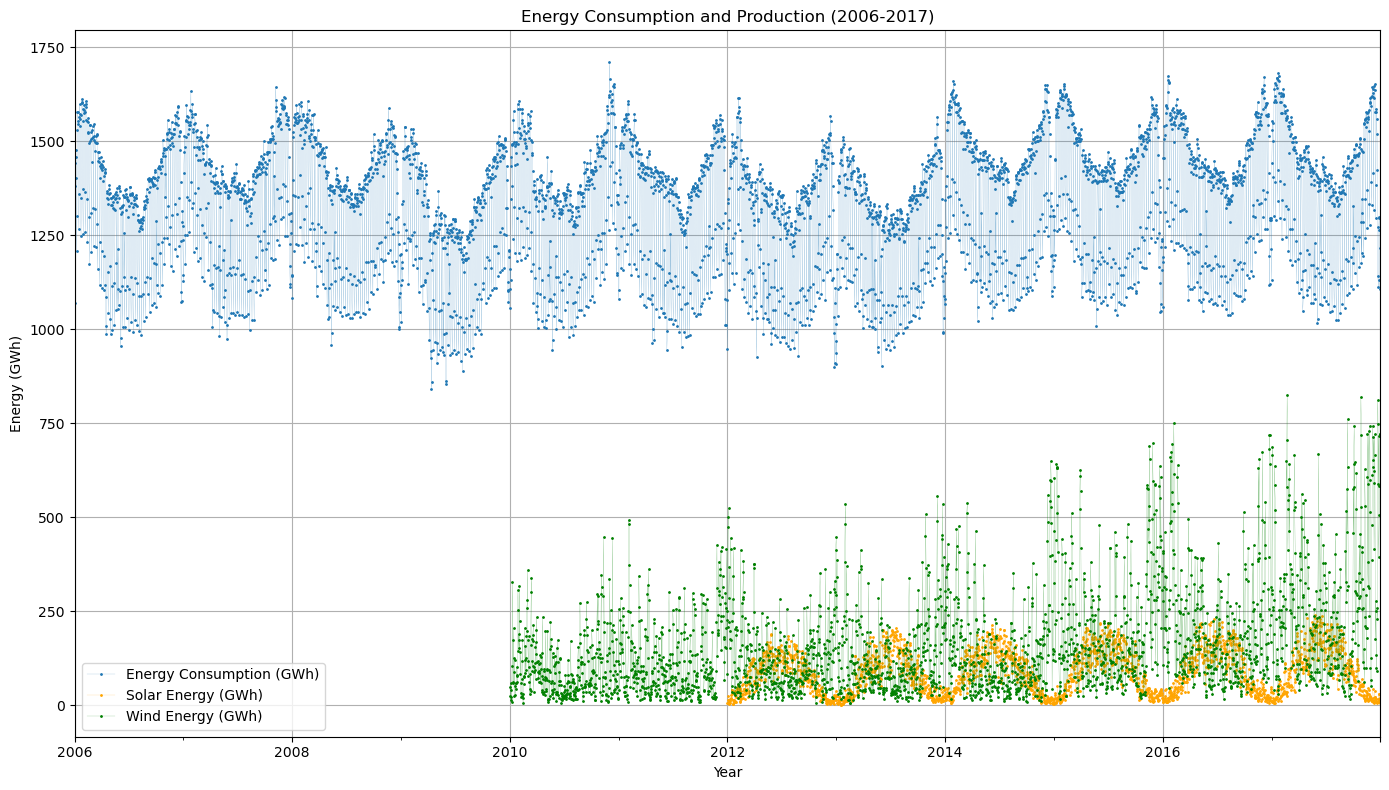

In [23]:
# YOUR CODE HERE

# appart
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

df_2006_to_2017['Consumption'].plot(ax=axes[0], marker='o', linestyle=None, linewidth=0.1, markersize=1)
axes[0].set_title("Germany's Daily Energy Consumption (2006-2017)")
axes[0].set_ylabel("Energy Consumption (GWh)")
axes[0].grid(True)

df_2006_to_2017['Solar'].plot(ax=axes[1], color='orange', marker='o', linestyle=None, linewidth=0.1, markersize=1)
axes[1].set_title("Solar Energy Production (2006-2017)")
axes[1].set_ylabel("Solar Energy (GWh)")
axes[1].grid(True)

df_2006_to_2017['Wind'].plot(ax=axes[2], color='green', marker='o', linestyle=None, linewidth=0.1, markersize=1)
axes[2].set_title("Wind Energy Production (2006-2017)")
axes[2].set_xlabel("Year")
axes[2].set_ylabel("Wind Energy (GWh)")
axes[2].grid(True)

plt.tight_layout()
plt.show()

# together
fig, ax = plt.subplots(figsize=(14, 8))

df_2006_to_2017['Consumption'].plot(ax=ax, marker='o', linestyle=None, linewidth=0.1, markersize=1, label="Energy Consumption (GWh)")
df_2006_to_2017['Solar'].plot(ax=ax, color='orange', marker='o', linestyle=None, linewidth=0.1, markersize=1, label="Solar Energy (GWh)")
df_2006_to_2017['Wind'].plot(ax=ax, color='green', marker='o', linestyle=None, linewidth=0.1, markersize=1, label="Wind Energy (GWh)")

ax.set_title("Energy Consumption and Production (2006-2017)")
ax.set_xlabel("Year")
ax.set_ylabel("Energy (GWh)")
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()

### 4. Looking for patterns in energy consumption of a specific year (7%)
Take advantage of timebased indexing using pandas' ``df.loc[...]`` functionality to pick out one specific year contained in the dataset for further examination.
Plot a time series plot of column ``Consumption`` for the year you chose.

To get full credit, please leave a comment describing the patterns you're able to make out.

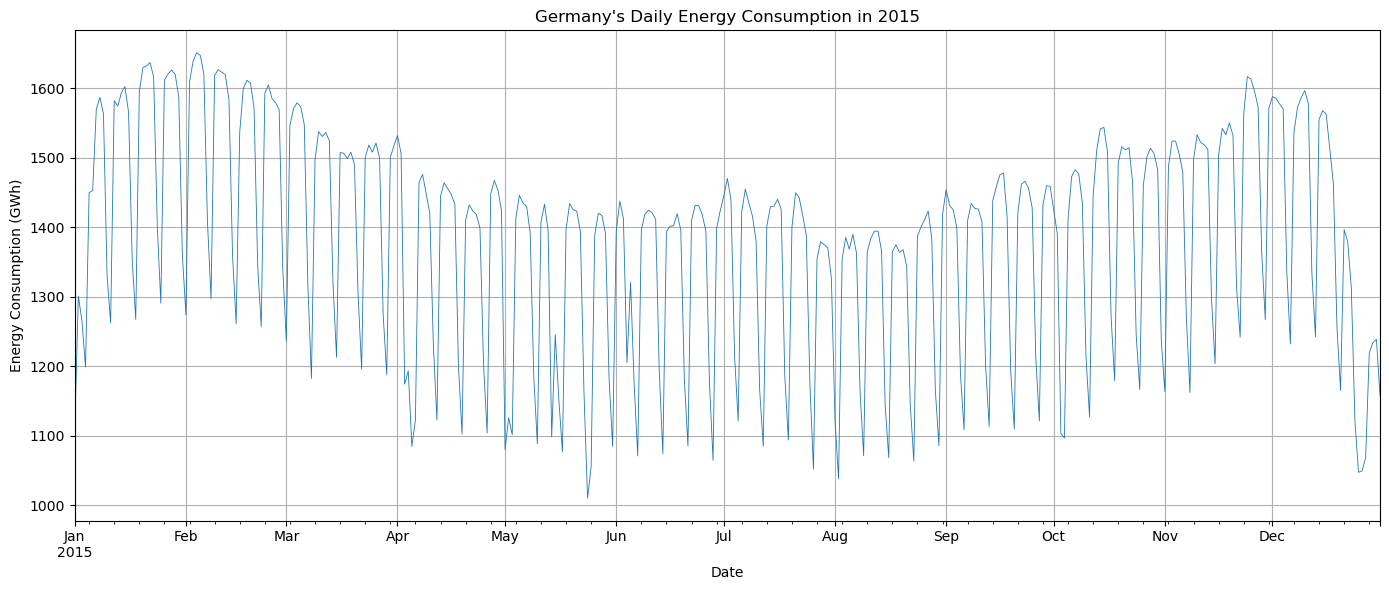

In [24]:
# YOUR CODE HERE
df_2015 = df.loc['2015-01-01':'2015-12-31']
df_2015

df_2015['Consumption'].plot(figsize=(14, 6), linewidth=0.6)
plt.title("Germany's Daily Energy Consumption in 2015")
plt.xlabel("Date")
plt.ylabel("Energy Consumption (GWh)")
plt.grid(True)
plt.tight_layout()
plt.show()

# The most obvious pattern we can see is that in the winter months theres more energy consumption (probably due to heating).
# We can also see 4 "spikes" per month. I am not 100% sure but an explaination for this could be the weekends, more peolpe at 
# home so more consumption.

### 5. Looking for patterns in energy consumption in all collected years (7%)

For the last task of this plotting section, let's switch over to ``seaborn`` and plot a boxplot for the monthly energy ``Consumption`` in Germany from 2006-2017.

What do you see? Leave a short comment describing your findings for full credit.

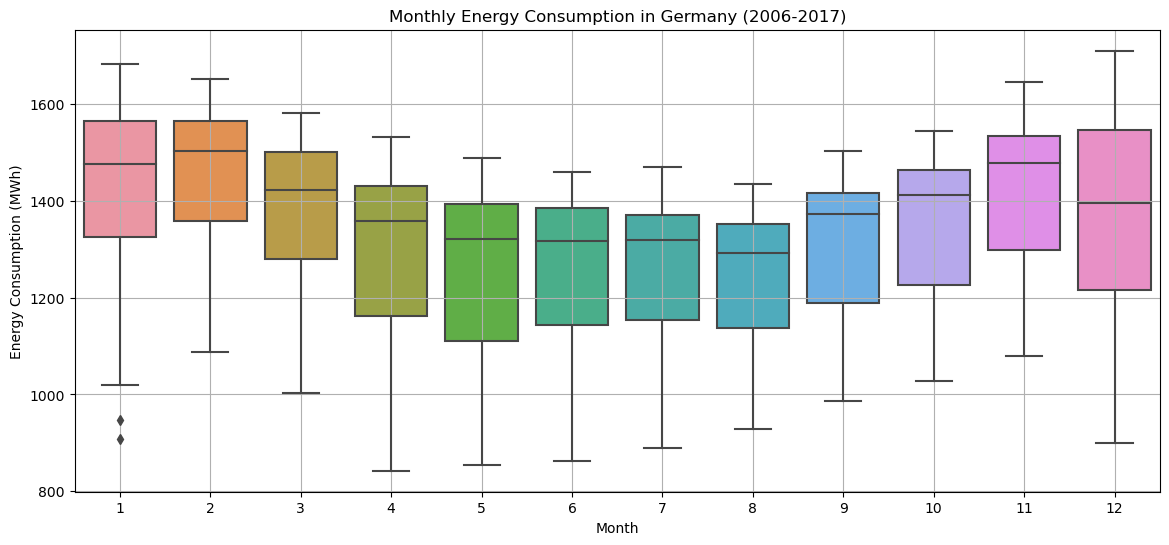

In [25]:
# YOUR CODE HERE

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_2006_to_2017, x='Month', y='Consumption')
plt.title("Monthly Energy Consumption in Germany (2006-2017)")
plt.xlabel("Month")
plt.ylabel("Energy Consumption (MWh)")
plt.grid(True)
plt.show()

# Same conclusion here, in the summer months theres less consumption, more in the winter.
# june and july have a slightly higher average consumption, this could be because of the summer vacation,
# kids / more people at home, ...

## TASK 3: Comparing Monthly Consumption and Production in a Single Plot (20%)

### 1. Resampling the data (10%)
To expand our analysis, we want to change the resolution of our data to reflect the sums of energy consumed and produced in a whole month.

Make yourself familiar with [``df.resample(...)``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) to achieve this and use it to create a new data frame containing columns ``Consumption``, ``Wind`` and ``Solar``.

Finally, print the last twelve months contained in your new DataFrame.

In [26]:
# YOUR CODE HERE
df_monthly = df[['Consumption', 'Wind', 'Solar']].resample('M').sum()

last_twelve_months = df_monthly.tail(12)
print(last_twelve_months)

            Consumption       Wind     Solar
Date                                        
2017-01-31  47441.37600   7820.927   798.428
2017-02-28  41970.81400   9899.826  1484.991
2017-03-31  44096.16300   9294.033  3230.717
2017-04-30  39884.71100   8132.362  3856.742
2017-05-31  41015.51400   5646.666  5120.356
2017-06-30  39105.83100   7127.965  5367.179
2017-07-31  39907.57800   5493.524  4886.359
2017-08-31  40029.77368   5499.798  4602.808
2017-09-30  40078.56092   6287.730  3079.291
2017-10-31  42355.21893  12480.097  2130.557
2017-11-30  44339.72455  10259.001   831.044
2017-12-31  44511.10431  14725.436   494.171



### 2. Plot monthly sums (10%)

- Plot a time series plot containing data for ``Consumption``, ``Wind`` and ``Solar`` from 2006-2017 in a single plot (read: on a single axis, don't use subplots!).
- Try out different colors and styles (area plots, line plots, ...) within this single plot that is requested.
- Make sure to add a legend!

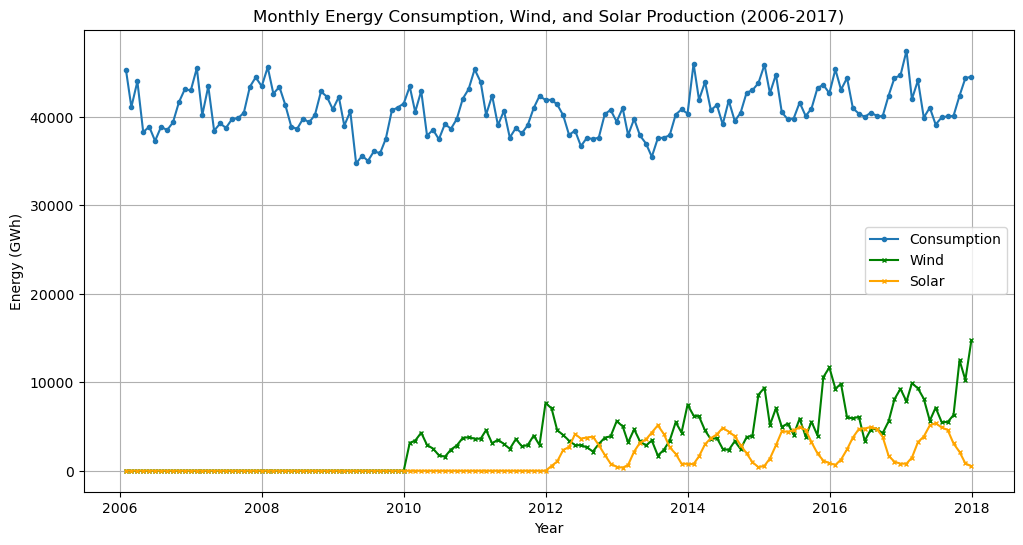

In [27]:
# YOUR CODE HERE
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['Consumption'], marker='o', markersize=3, label='Consumption', linewidth=1.5)
plt.plot(df_monthly.index, df_monthly['Wind'], marker='x', markersize=3, label='Wind', color='green', linewidth=1.5)
plt.plot(df_monthly.index, df_monthly['Solar'], marker='x', markersize=3, label='Solar', color='orange', linewidth=1.5)

plt.title("Monthly Energy Consumption, Wind, and Solar Production (2006-2017)")
plt.xlabel("Year")
plt.ylabel("Energy (GWh)")
plt.grid(True)

# Add a legend
plt.legend()

plt.show()

## TASK 4: Use Your Own Data (25%)

Go to [Wiki Pageviews](https://tools.wmflabs.org/pageviews/) and download a dataset of the pageviews of a Wikipedia page of your choice.
- Enter the page name(s) you want to find out more about.
- Click into the Dates field and choose "All time".
- Download the .csv file.

Next, load the data into a pandas ``DataFrame``:
- Change the index to make use of timebased indexing (`DateTimeIndex`).
- Inspect the dataset (missing values?)
- Try to find patterns:
  - selecting just one year/month
  - grouping monthly/weekly
- Finally, for your submission, show at least one plot with a weekly aggregate of numbers.

Missing values:
Lockdown    0
Year        0
Month       0
Weekday     0
dtype: int64


,Lockdown,Year,Month,Weekday
Date,,,,
2015-07-01,193,2015,7,Wednesday
2015-07-02,439,2015,7,Thursday
2015-07-03,174,2015,7,Friday
2015-07-04,169,2015,7,Saturday
2015-07-05,146,2015,7,Sunday


,Lockdown,Year,Month
count,3029.000000,3029.000000,3029.000000
mean,713.418620,2019.136679,6.584681
std,2525.721589,2.419470,3.408627
min,71.000000,2015.000000,1.000000
25%,164.000000,2017.000000,4.000000
50%,215.000000,2019.000000,7.000000
75%,556.000000,2021.000000,9.000000
max,76334.000000,2023.000000,12.000000


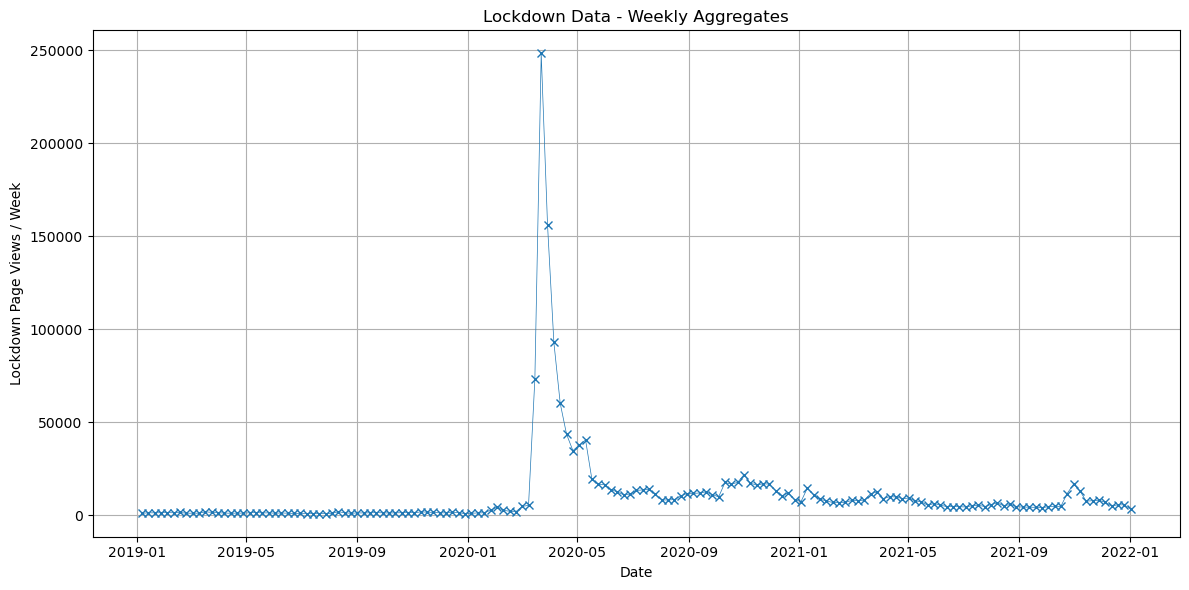

In [28]:
# YOUR CODE HERE
df_lockdown = pd.read_csv('./lockdown.csv')
df_lockdown['Date'] = pd.to_datetime(df_lockdown['Date'])
df_lockdown.set_index('Date', inplace=True)

date_index = pd.DatetimeIndex(df_lockdown.index)

df_lockdown['Year'] = date_index.year
df_lockdown['Month'] = date_index.month
df_lockdown['Weekday'] = date_index.day_name()

print('Missing values:')
print(df_lockdown.isna().sum())

display(df_lockdown.head())

display(df_lockdown.describe())

df_lockdown = df_lockdown.loc['2019':'2021']

weekly_agg = df_lockdown.resample('W').sum()
plt.figure(figsize=(12, 6))
plt.plot(weekly_agg.index, weekly_agg['Lockdown'], marker='x', linestyle='-', linewidth=0.5)
plt.title(f'Lockdown Data - Weekly Aggregates')
plt.xlabel('Date')
plt.ylabel('Lockdown Page Views / Week')
plt.grid(True)
plt.tight_layout()
plt.show()


# There are no patterns to be found in the graph (with just this data). The big spike is there because of the covid19 pandemic.
# The other smaller spikes are probably because of 2nd lockdowns but people cared less or already knew what it was at that time.
# So if we would have the dates from when lockdowns would be announced, combined with covid19 infections we could
# potentionally see a correlation.